In [28]:
#importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.layers import Input, Lambda, Dense, Flatten
from glob import glob
from keras.models import Model
from keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array

In [27]:
# %pip install tensorflow
# %pip install Keras-Preprocessing

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
train_directory = tf.keras.utils.image_dataset_from_directory(
    "D:/Projects/Project Dataset/OCT2017/train",
)
valid_directory = tf.keras.utils.image_dataset_from_directory(
    "D:/Projects/Project Dataset/OCT2017/val",
)

Found 71382 files belonging to 4 classes.
Found 32 files belonging to 4 classes.


In [4]:

training_path = "D:/Projects/Project Dataset/OCT2017/train"
validation_path = "D:/Projects/Project Dataset/OCT2017/val"

# files in each category for training
num_CNV_tr = len(os.listdir(os.path.join(training_path, "CNV")))
num_DME_tr = len(os.listdir(os.path.join(training_path, "DME")))
num_DRUSEN_tr = len(os.listdir(os.path.join(training_path, "DRUSEN")))
num_NORMAL_tr = len(os.listdir(os.path.join(training_path, "NORMAL")))

# Count the number of files in each category for validation
num_CNV_val = len(os.listdir(os.path.join(validation_path, "CNV")))
num_DME_val = len(os.listdir(os.path.join(validation_path, "DME")))
num_DRUSEN_val = len(os.listdir(os.path.join(validation_path, "DRUSEN")))
num_NORMAL_val = len(os.listdir(os.path.join(validation_path, "NORMAL")))

# Calculate the total number of files for training and validation
total_train = num_CNV_tr + num_DME_tr + num_DRUSEN_tr + num_NORMAL_tr
total_val = num_CNV_val + num_DME_val + num_DRUSEN_val + num_NORMAL_val

# Create bar graphs
categories = ["CNV", "DME", "DRUSEN", "NORMAL"]
training_counts = [num_CNV_tr, num_DME_tr, num_DRUSEN_tr, num_NORMAL_tr]
validation_counts = [num_CNV_val, num_DME_val, num_DRUSEN_val, num_NORMAL_val]

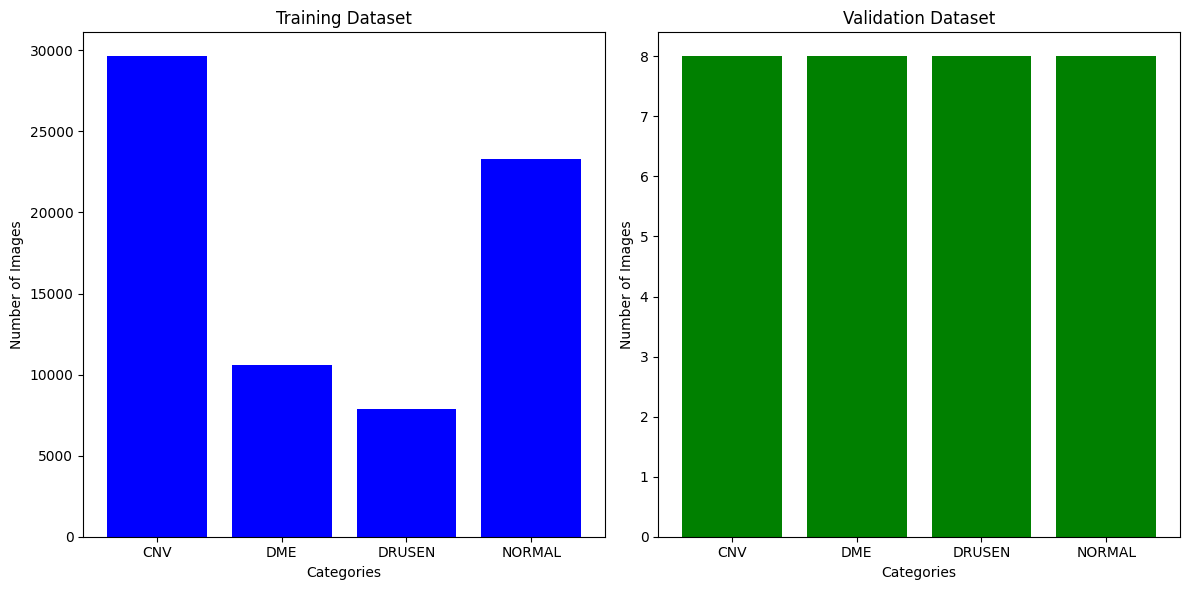

In [5]:
plt.figure(figsize=(12, 6))

# Bar graph for training dataset
plt.subplot(1, 2, 1)
plt.bar(categories, training_counts, color='blue')
plt.title('Training Dataset')
plt.xlabel('Categories')
plt.ylabel('Number of Images')

# Bar graph for validation dataset
plt.subplot(1, 2, 2)
plt.bar(categories, validation_counts, color='green')
plt.title('Validation Dataset')
plt.xlabel('Categories')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()

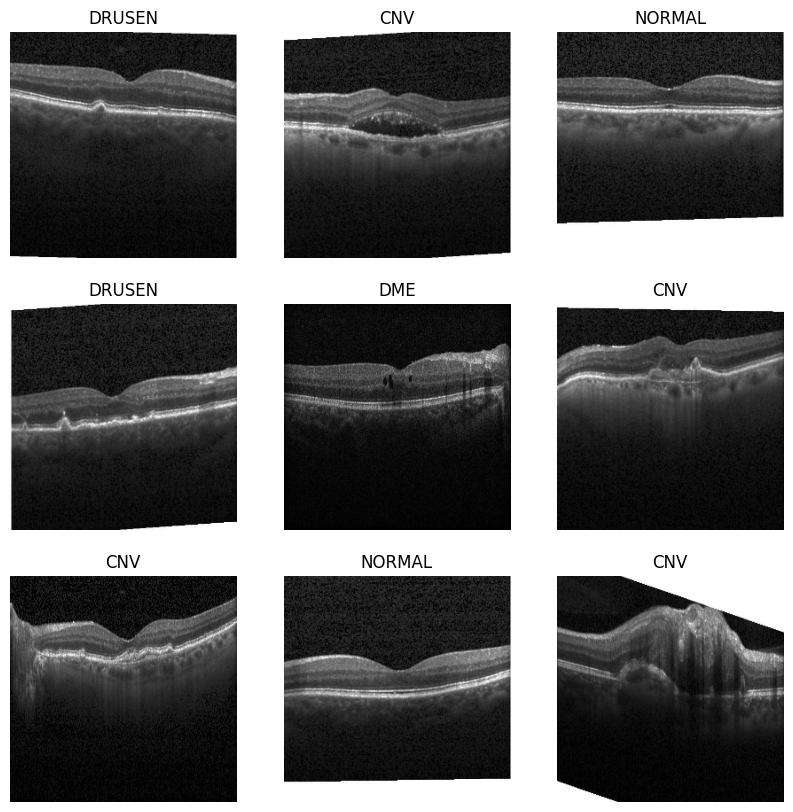

In [6]:
class_names = ["CNV", "DME", "DRUSEN", "NORMAL"]
plt.figure(figsize=(10,10))
for images, labels in train_directory.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
BATCH_SIZE = 100
IMG_SHAPE  = 128

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Preprocessing (Image Augmentation)

In [9]:
#Flipping the image horizontally

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory="D:/Projects/Project Dataset/OCT2017/train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 71382 images belonging to 4 classes.


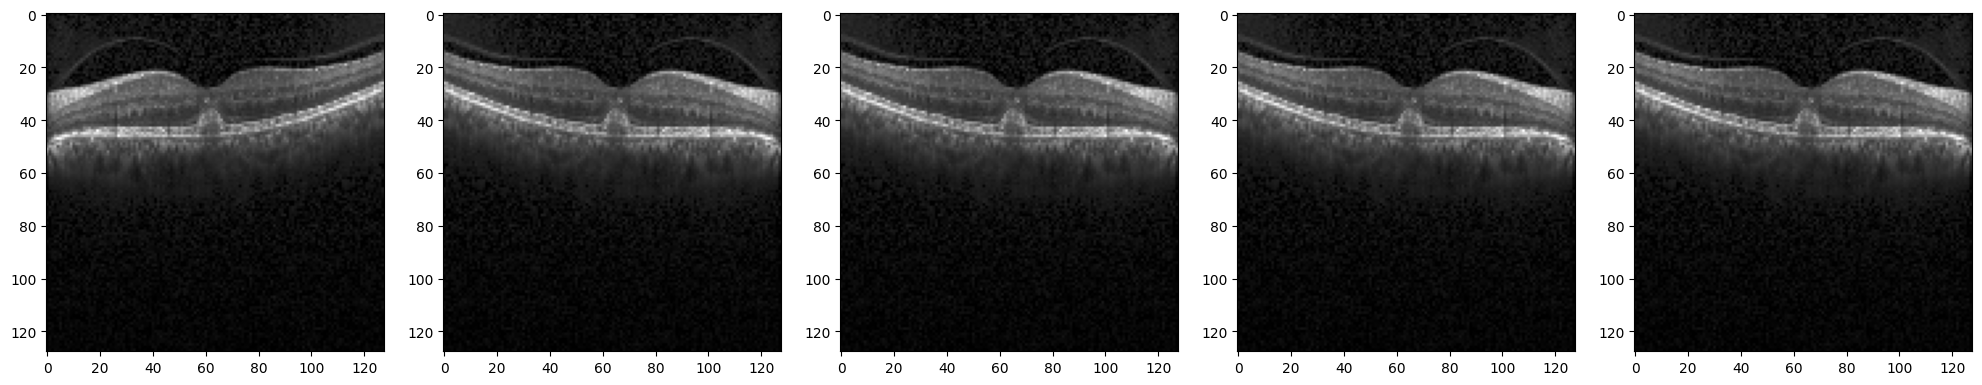

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 71382 images belonging to 4 classes.


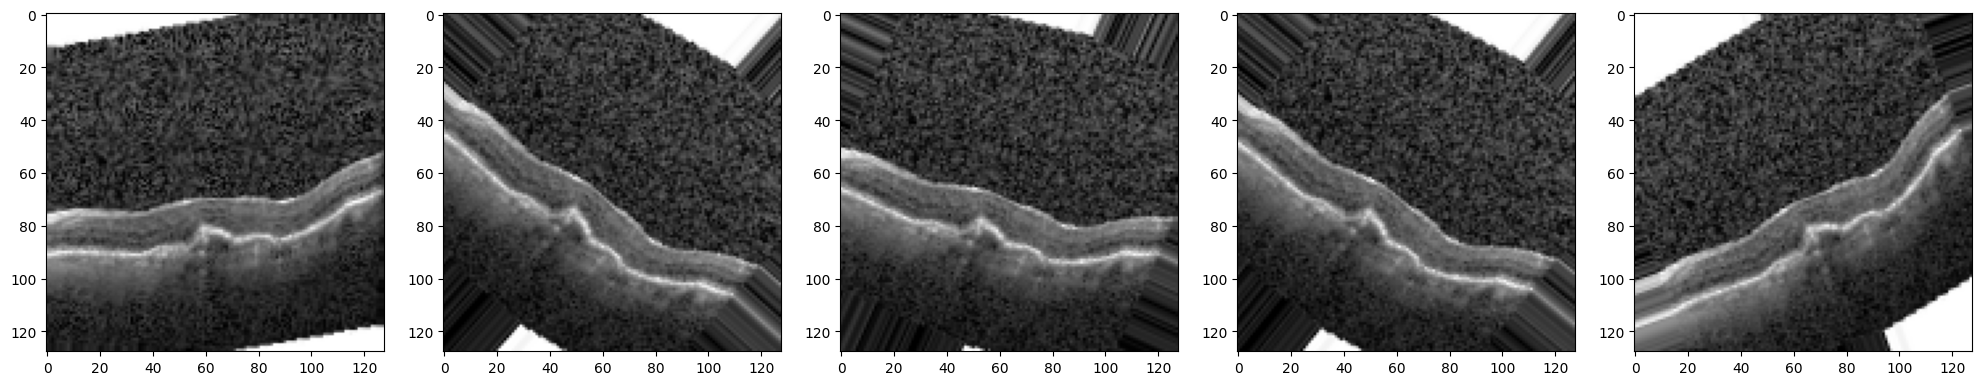

In [11]:
#Rotating the Image

image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory="D:/Projects/Project Dataset/OCT2017/train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 71382 images belonging to 4 classes.


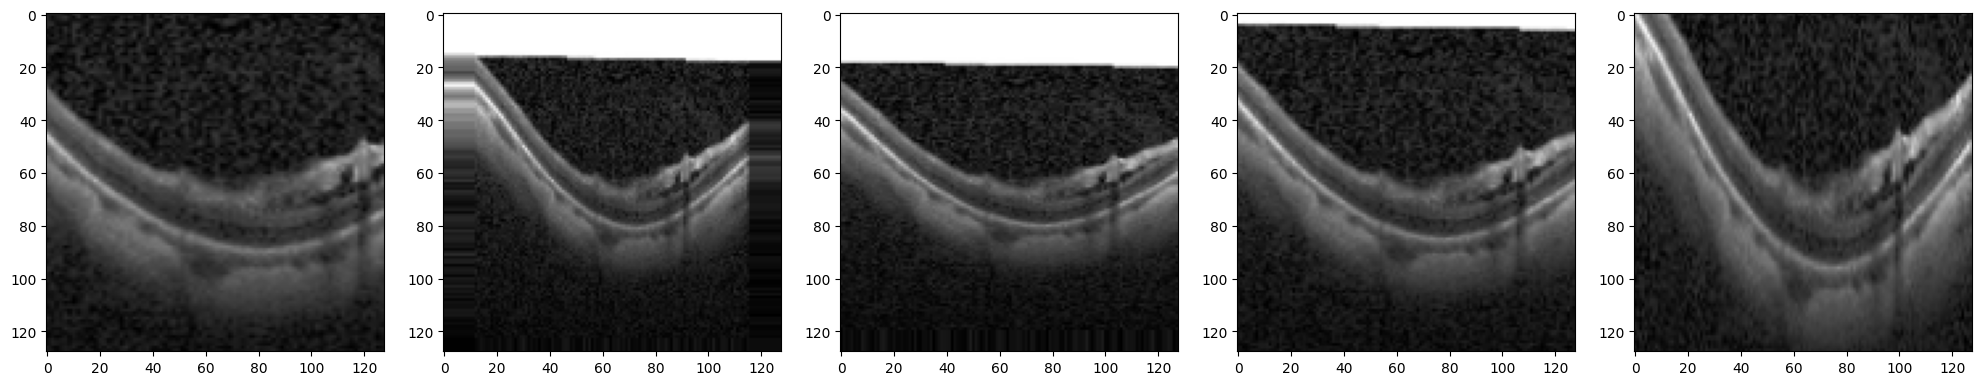

In [12]:
# Applying Zoom

image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory= "D:/Projects/Project Dataset/OCT2017/train",
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 71382 images belonging to 4 classes.


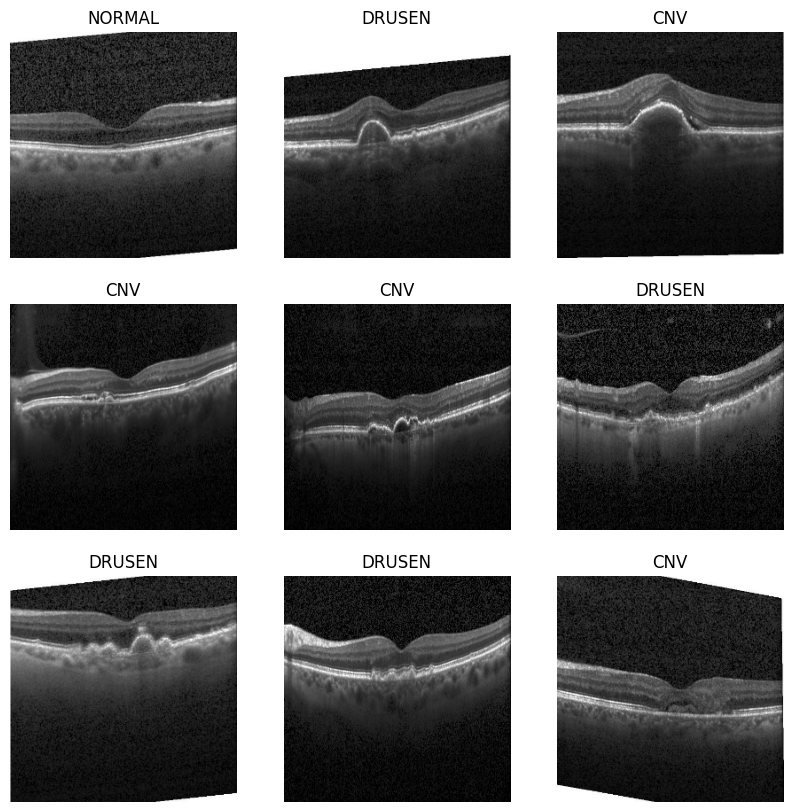

In [13]:
# Using Augmentation all together

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory= "D:/Projects/Project Dataset/OCT2017/train",
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

class_names = ["CNV", "DME", "DRUSEN", "NORMAL"]
plt.figure(figsize=(10,10))
for images, labels in train_directory.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
# validation data generation

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory="D:/Projects/Project Dataset/OCT2017/val",
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 32 images belonging to 4 classes.


Creating the Model

In [15]:
#define model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3)
])

In [16]:
IMAGE_SIZE =[128, 128]

Train with VGG16 Model

In [17]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [18]:
# getting number of classes
folders = glob('D:/Projects/Project Dataset/OCT2017/train/*')
len(folders)

4

In [19]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [20]:
# create model object
vggModel = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
vggModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

                                                                 
 block5_conv2 (Conv2D)       (None, 8, 8, 512)         2359808   
                                                                 
 block5_conv3 (Conv2D)       (None, 8, 8, 512)         2359808   
                                                                 
 block5_pool (MaxPooling2D)  (None, 4, 4, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 32772     
                                                                 
Total params: 14,747,460
Trainable params: 32,772
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
vggModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
vggHistory = vggModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=5,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

C:\Users\Ashfak\AppData\Local\Temp\ipykernel_10316\1559523256.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vggHistory = vggModel.fit_generator(


Epoch 1/5


c:\Users\Ashfak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


714/714 [==============================] - 3205s 4s/step - loss: 0.7431 - accuracy: 0.7235 - val_loss: 0.4451 - val_accuracy: 0.8125
Epoch 2/5
714/714 [==============================] - 2983s 4s/step - loss: 0.6163 - accuracy: 0.7738 - val_loss: 0.4222 - val_accuracy: 0.8438
Epoch 3/5
714/714 [==============================] - 3271s 5s/step - loss: 0.5881 - accuracy: 0.7840 - val_loss: 0.3815 - val_accuracy: 0.8438
Epoch 4/5
714/714 [==============================] - 3136s 4s/step - loss: 0.5706 - accuracy: 0.7907 - val_loss: 0.3993 - val_accuracy: 0.8125
Epoch 5/5
714/714 [==============================] - 3173s 4s/step - loss: 0.5641 - accuracy: 0.7938 - val_loss: 0.3318 - val_accuracy: 0.8438


In [23]:
# Define a file name to save the training history
history_file = 'vgg_training_history.pkl'

# Save the training history
with open(history_file, 'wb') as file:
    pickle.dump(vggHistory.history, file)


In [24]:
# Load the training history
with open(history_file, 'rb') as file:
    loaded_history = pickle.load(file)

# You can access training metrics like loss and accuracy
print(loaded_history['loss'])
print(loaded_history['accuracy'])


[0.7431211471557617, 0.6163421273231506, 0.5881326794624329, 0.5705991983413696, 0.5641005635261536]
[0.7235157489776611, 0.7737525105476379, 0.7839651703834534, 0.7907175421714783, 0.7938275933265686]


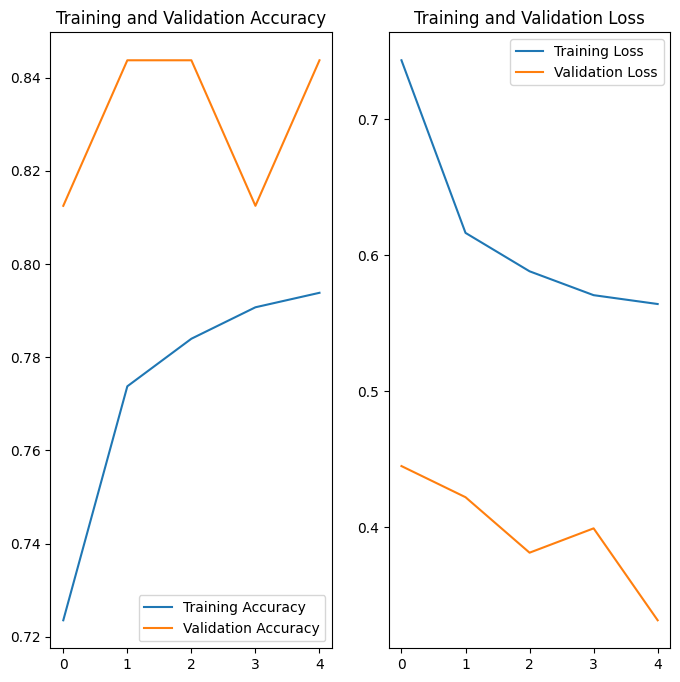

In [49]:
acc = vggHistory.history['accuracy']
val_acc = vggHistory.history['val_accuracy']

loss = vggHistory.history['loss']
val_loss = vggHistory.history['val_loss']

epochs=5
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
vggModel.save('vggModel.h5')

Prediction with VGG16 model

In [30]:
modelVGG = load_model('./vggModel.h5',compile=False)

In [31]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen_predict = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  horizontal_flip=True)

training_set = train_data_gen_predict.flow_from_directory("D:/Projects/Project Dataset/OCT2017/train",
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = "categorical")
lab=training_set.class_indices
lab={k:v for v,k in lab.items()}

Found 71382 images belonging to 4 classes.


In [34]:
def output(location):

  img =load_img(location,target_size=(128,128,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=modelVGG.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

1/1 [==============================] - 0s 219ms/step


'CNV'

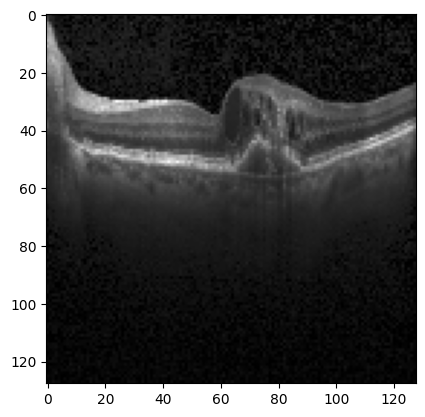

In [35]:
img="D:/Projects/Project Dataset/OCT2017/test/CNV/CNV-53018-1.jpeg"
pic=load_img("D:/Projects/Project Dataset/OCT2017/test/CNV/CNV-53018-1.jpeg",target_size=(128,128,3))
plt.imshow(pic)
output(img)

Train with MobileNetV2 model

In [36]:
from keras.applications.mobilenet_v2 import MobileNetV2

# add preprocessing layer to the front of MobileNet
MobileNet = MobileNetV2(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in MobileNet.layers:
  layer.trainable = False

9406464/9406464 [==============================] - 3s 0us/step


In [37]:
folders = glob('D:/Projects/Project Dataset/OCT2017/train/*')
len(folders)

4

In [38]:
x = Flatten()(MobileNet.output)
# x = Dense(1000, activation='relu')(x)
mobileNetPrediction = Dense(len(folders), activation='softmax')(x)

In [39]:
# create a model object
mobileNetModel = Model(inputs=MobileNet.input, outputs=mobileNetPrediction)

# view the structure of the model
mobileNetModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

In [40]:
mobileNetModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
mobileNetHistory = mobileNetModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=5,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

C:\Users\Ashfak\AppData\Local\Temp\ipykernel_10316\614221325.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mobileNetHistory = mobileNetModel.fit_generator(


Epoch 1/5


c:\Users\Ashfak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


714/714 [==============================] - 1937s 3s/step - loss: 0.9560 - accuracy: 0.7336 - val_loss: 0.1431 - val_accuracy: 0.9688
Epoch 2/5
714/714 [==============================] - 602s 842ms/step - loss: 0.9441 - accuracy: 0.7595 - val_loss: 0.2378 - val_accuracy: 0.9375
Epoch 3/5
714/714 [==============================] - 601s 842ms/step - loss: 0.9566 - accuracy: 0.7654 - val_loss: 0.0629 - val_accuracy: 0.9688
Epoch 4/5
714/714 [==============================] - 616s 862ms/step - loss: 0.9506 - accuracy: 0.7708 - val_loss: 0.4818 - val_accuracy: 0.8125
Epoch 5/5
714/714 [==============================] - 636s 890ms/step - loss: 1.0112 - accuracy: 0.7693 - val_loss: 0.3355 - val_accuracy: 0.9062


In [43]:
history_file_mobileNet = 'mobileNet_training_history.pkl'

# Save the training history
with open(history_file_mobileNet, 'wb') as file:
    pickle.dump(mobileNetHistory.history, file)

In [44]:
# Load the training history
with open(history_file_mobileNet, 'rb') as file:
    loaded_history = pickle.load(file)

# You can access training metrics like loss and accuracy
print(loaded_history['loss'])
print(loaded_history['accuracy'])

[0.9559584856033325, 0.9441372752189636, 0.9565623998641968, 0.9506142139434814, 1.0112005472183228]
[0.7335602641105652, 0.759547233581543, 0.7654170393943787, 0.7707685232162476, 0.7692835927009583]


In [45]:
mobileNetModel.save('mobileNetModel.h5')

In [46]:
def output(location):

  img =load_img(location,target_size=(128,128,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=mobileNetModel.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

1/1 [==============================] - 1s 820ms/step


'CNV'

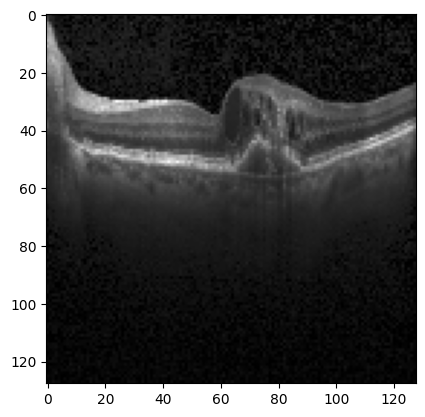

In [47]:
img="D:/Projects/Project Dataset/OCT2017/test/CNV/CNV-53018-1.jpeg"
pic=load_img("D:/Projects/Project Dataset/OCT2017/test/CNV/CNV-53018-1.jpeg",target_size=(128,128,3))
plt.imshow(pic)
output(img)

Training InceptionV3

In [50]:
from keras.applications.inception_v3 import InceptionV3

# add preprocessing layer to the front of Inception
inception = InceptionV3(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
  layer.trainable = False

87910968/87910968 [==============================] - 38s 0us/step


In [52]:
folders = glob('D:/Projects/Project Dataset/OCT2017/train/*')
len(folders)

4

In [51]:
x = Flatten()(inception.output)
inceptionPrediction = Dense(len(folders), activation='softmax')(x)

In [53]:
# create a model object
inceptionModel = Model(inputs=inception.input, outputs=inceptionPrediction)

# view the structure of the model
inceptionModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 63, 63, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                            

In [54]:
inceptionModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
inceptionHistory = inceptionModel.fit_generator(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=5,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

C:\Users\Ashfak\AppData\Local\Temp\ipykernel_10316\1226269188.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  inceptionHistory = inceptionModel.fit_generator(


Epoch 1/5


c:\Users\Ashfak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


714/714 [==============================] - 1621s 2s/step - loss: 1.1184 - accuracy: 0.6468 - val_loss: 0.8406 - val_accuracy: 0.6250
Epoch 2/5
714/714 [==============================] - 691s 968ms/step - loss: 0.9785 - accuracy: 0.6835 - val_loss: 0.9774 - val_accuracy: 0.6562
Epoch 3/5
714/714 [==============================] - 742s 1s/step - loss: 0.9848 - accuracy: 0.6879 - val_loss: 0.7432 - val_accuracy: 0.7188
Epoch 4/5
714/714 [==============================] - 760s 1s/step - loss: 1.0036 - accuracy: 0.6883 - val_loss: 0.7395 - val_accuracy: 0.5938
Epoch 5/5
714/714 [==============================] - 814s 1s/step - loss: 0.9624 - accuracy: 0.6960 - val_loss: 0.8852 - val_accuracy: 0.6250


In [56]:
history_file_inception = 'inception_training_history.pkl'

# Save the training history
with open(history_file_inception, 'wb') as file:
    pickle.dump(inceptionHistory.history, file)

In [57]:
# Load the training history
with open(history_file_inception, 'rb') as file:
    loaded_history = pickle.load(file)

# You can access training metrics like loss and accuracy
print(loaded_history['loss'])
print(loaded_history['accuracy'])

[1.1184481382369995, 0.9784919023513794, 0.984847903251648, 1.0036392211914062, 0.9624332785606384]
[0.6468297243118286, 0.6834636330604553, 0.687932550907135, 0.6883108019828796, 0.6959737539291382]


In [58]:
inceptionModel.save('inceptionModel.h5')

In [59]:
def output(location):

  img =load_img(location,target_size=(128,128,3))
  img=img_to_array(img)
  img=img/255
  img=np.expand_dims(img,[0])
  answer=inceptionModel.predict(img)
  y_class = answer.argmax(axis=-1)
  y="".join(str(x) for x in y_class)
  y=int(y)
  res=lab[y]
  return res

1/1 [==============================] - 1s 1s/step


'CNV'

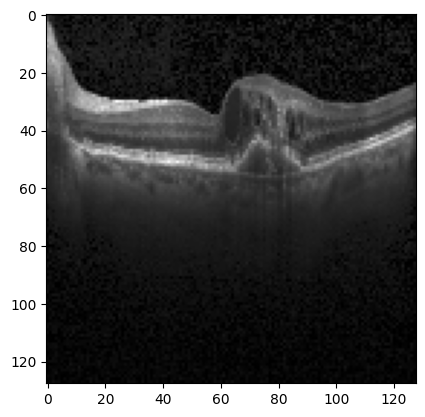

In [60]:
#show images
img="D:/Projects/Project Dataset/OCT2017/test/CNV/CNV-53018-1.jpeg"
pic=load_img("D:/Projects/Project Dataset/OCT2017/test/CNV/CNV-53018-1.jpeg",target_size=(128,128,3))
plt.imshow(pic)
output(img)